# Two-body Problem

The two-body problem can be solved by transforming it into tow one-body
problems. The first one describes the trivial motion of the center and mass and will not be considered here. The second is explained below. With Newton's second law we get:

$$\textbf{F}_{12}(\textbf{x}_1,\textbf{x}_2)=m_1\ddot{\textbf{x}}_1\\\textbf{F}_{21}(\textbf{x}_1,\textbf{x}_2)=m_2\ddot{\textbf{x}}_2$$
If both equations are divided by there respective mass, are subtracted
and then rearranged we get the equation.
 
$$\ddot{\textbf{r}}=\ddot{\textbf{x}}_1-\ddot{\textbf{x}}_2=\left(\frac{1}{m_1}-\frac{1}{m_2}\right)\textbf{F}_{12}$$

Itroducing the reduced $\mu = \frac{m_1m_2}{m_1+m_2}$ and using the gravitational force $|\textbf{F}_{12}|=|\textbf{F}_{21}|=\frac{Gm_1m_2}{r^2}$ we get the familiar equation

$$\mu\ddot{\textbf{r}}=-\frac{Gm_1m_2}{r^2}\frac{\textbf{r}}{r}.$$  


To solve this seond order differential equation numerically it needs to be transformed into two first order differential equations. This can be achieved with the velocity $\textbf{v}$.  


$$\ddot{\textbf{r}}=\textbf{v}\\\ddot{\textbf{v}}=-\frac{Gm_1m_2}{r^2}\frac{\textbf{r}}{r}$$  

One more step to simplify this problem is to introduce dimensionless variables.
First transform the variable $\textbf{r}$ by using the initial separation of the bodies $R_0$.

$$\textbf{s}=\frac{\textbf{r}}{R_0}$$  

To transform the velocity we use the conservation of energy.

$$E=T+U=\frac{\mu}{2}v^2-\frac{GM\mu}{r}\quad \rightarrow\quad V_0=\left(\frac{GM}{R_0}\right)^{\frac{1}{2}}\\\textbf{w}=\frac{\textbf{v}}{V_0}$$  

The time will be transformed as follows:

$$\tau=\frac{t}{T_0}\quad \textrm{with}\quad T_0=\frac{R_0}{V_0}=\left(\frac{R_0^3}{GM}\right)^{\frac{1}{2}}$$  

So the final equations that have to solved numerically are given by

$$\frac{d\textbf{s}}{d\tau}=\textbf{w}\\\frac{d\textbf{w}}{d\tau}=-\frac{\textbf{s}}{s^3}$$  

The angular momentum is conserved and hence the movement of the two masses takes place in a plane. So to describe the system we need the four components $\textbf{u}=(s_x,s_y,w_x,w_y)^T$.  
In the following the two-body problem is solved using different integration schemes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters 
m1 = 1.99 * 10**30
m2 = 10**-3 * m1
R0 = 1.496 * 10**11
V0 = 2.98 * 10**4
T0 = R0 / V0

# Initial values - These are allready given in the dimensionless forme
u_init = np.array([1, 0, 0, 0.5])

# To get the time step in the dimensionless form we devide it by T0
#dt_real_time = 60 * 60 * 6 # One step every hour
#dt = dt_real_time / T0
#numSteps = int(365*2)

dt = 0.008

numberOrbits = 100
numSteps = int(numberOrbits * (156 * 60 * 60 * 24 / (dt * T0)))  # Approxematly an orbit of half a year 


## Leap Frog scheme 

In [2]:
# Calculate the acceleration

def acc(s):
    
    r = np.hypot(s[0], s[1])
    return -s/r**3

In [3]:
# One step of the leap frog algorithm

def leapFrogStep(f, currentS, currentW, dt):
    
    wPlusHalf = currentW + 0.5 * f(currentS) * dt   # Kick
    sPlusOne = currentS + wPlusHalf * dt            # Drift
    wPlusOne = wPlusHalf + 0.5 * f(sPlusOne) * dt   # Kick
    
    return sPlusOne, wPlusOne

In [4]:
# Performe the leap frog integration

def leapFrog(f, u0, dt, numIterations=numSteps):
    
    resultS = np.zeros([numIterations, 2])
    resultW = np.zeros([numIterations, 2])
    
    sx0, sy0, wx0, wy0 = u0
    
    resultS[0,:] = [sx0, sy0]
    resultW[0,:] = [wx0, wy0]
    
    for i in range(1, numIterations):
        resultS[i], resultW[i] = leapFrogStep(f, resultS[i-1], resultW[i-1], dt)
    
    return resultS, resultW

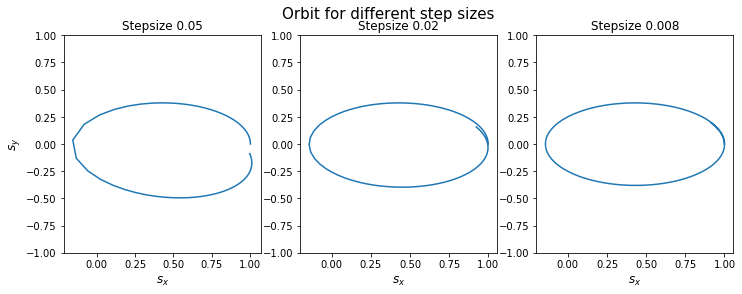

In [5]:
# Do the numerical solving with the leap frog sceme for different stepsizes 
# and plot the result

s_lf_step_0_05, _ = leapFrog(acc, u_init, 0.05, int(365 * 60 * 60 * 12 / (0.05 * T0)))
s_lf_step_0_02, _ = leapFrog(acc, u_init, 0.02, int(365 * 60 * 60 * 12 / (0.02 * T0)))
s_lf_step_0_008, _ = leapFrog(acc, u_init, 0.008, int(365 * 60 * 60 * 12 / (0.008 * T0)))

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle("Orbit for different step sizes", fontsize=15)

sx, sy = s_lf_step_0_05.T
axs[0].plot(sx, sy)
axs[0].set_title("Stepsize 0.05")
axs[0].set_ylim([-1,1])
axs[0].set_xlabel(R"$s_x$", fontsize=12)
axs[0].set_ylabel(R"$s_y$", fontsize=12)

sx, sy = s_lf_step_0_02.T
axs[1].plot(sx, sy)
axs[1].set_ylim([-1,1])
axs[1].set_title("Stepsize 0.02")
axs[1].set_xlabel(R"$s_x$", fontsize=12)

sx, sy = s_lf_step_0_008.T
axs[2].plot(sx, sy)
axs[2].set_title("Stepsize 0.008")
axs[2].set_ylim([-1,1])
axs[2].set_xlabel(R"$s_x$", fontsize=12)

plt.show()

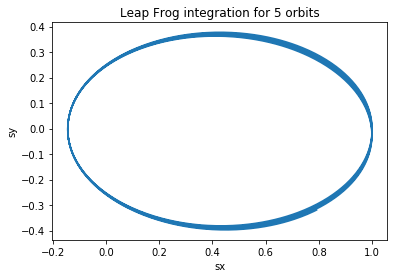

In [6]:
# Plot the 5 first orbits

s, _ = leapFrog(acc, u_init, 0.008, 5 * int(365 * 60 * 60 * 12 / (0.008 * T0)))

sx, sy = s.T

plt.plot(sx, sy)
plt.xlabel("sx")
plt.ylabel("sy")
plt.title("Leap Frog integration for 5 orbits")
plt.show()

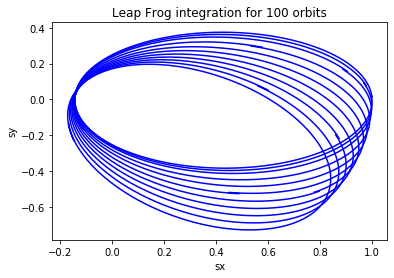

In [7]:
# Run the leap frog integration for about 100 orbits

s, w = leapFrog(acc, u_init, dt)

stepsForOrbit = int(numSteps / numberOrbits) + 10

tempS = s[0:stepsForOrbit]
for k in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
    sx, sy = s[k*stepsForOrbit:(k+1)*stepsForOrbit].T
    plt.plot(sx, sy, "-b")    

plt.xlabel("sx")
plt.ylabel("sy")
plt.title("Leap Frog integration for 100 orbits")
plt.show()

### Second order Runge Kutta sceme


In [8]:
# Define the right side of the differential equation

def rightSide(u): 
    sx, sy, wx, wy = u
    r = np.hypot(sx, sy)

    return np.array([wx, wy, -sx/r**3, -sy/r**3])


In [9]:
# Function to performe one step of RK2

def RK2Step(f, currentState, dt):
    
    k1 = dt * f(currentState)
    k2 = dt * f(currentState + k1)

    return currentState + 0.5 * (k1 + k2)


In [10]:
# Function to perform the RK2 integration

def RK2(f, u0, dt, numIterations=numSteps):
    y = np.zeros([numIterations, len(u0)])
    y[0,:] = u0

    for k in range(1, numIterations):
        y[k,:] = RK2Step(f, y[k-1], dt)

    return y

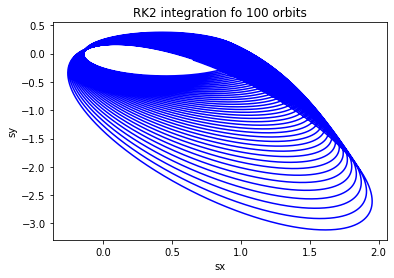

In [11]:
# Determine the trajectory for 100 orbits

result_rk2 = RK2(rightSide, u_init, dt)

result_sx,result_sy,result_wx,result_wy = result_rk2.T

plt.xlabel("sx")
plt.ylabel("sy")
plt.plot(result_sx,result_sy, "-b")
plt.title("RK2 integration fo 100 orbits")
plt.show()

### Comparison of leap frog and RK2
Looking at the figures illustrating the long term evolution (100 orbits) of the leap frog and the RK2 integration it is obvious that the leap frog integration performs much better.
The size of the orbit for the leap frog integration stay approximately the same while the orbit size for the RK2 method increases strongly.
The reason for the good performance of the leap frog method is its time reversibilty and the good conservation of the total energy resulting from that.
